# Objective:
1.Identify key customer segments based on:
- Revenue contribution
- Order frequency
- Average order value (AOV)

2.Visualize top customer segments and understand who your high-value customers are

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned order data
df = pd.read_csv(r'C:\Users\Durga\Desktop\Career 2025\MeriSkill\Order_Data_Cleaned.csv')

# Preview the data
df.head()

C:\Users\Durga\AppData\Local\Temp\ipykernel_6048\30212770.py:6: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Durga\Desktop\Career 2025\MeriSkill\Order_Data_Cleaned.csv')


,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
0,SO45080,Northwest,United States,14657,JOHN THOMAS,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,01-01-2020,Meta-ads\r,I4127227587819694,False,CREDITCARD,DISCOVER,M
1,SO45079,Southwest,United States,29255,KYLE WASHINGTON,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,01-01-2020,Google-ads\r,E9525730529761877,False,CREDITCARD,MC,M
2,SO45082,Australia,Australia,11455,ROSS SANZ,BK-M82B-44,Plants,1,1.0,1898.0944,3374.99,01-01-2020,Google-ads\r,Z6376643485803420,False,CREDITCARD,VISA,M
3,SO45081,Canada,Canada,26782,SETH LEWIS,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,01-01-2020,Google-ads\r,R8609290025411138,False,CREDITCARD,VISA,M
4,SO45083,United Kingdom,United Kingdom,14947,ALEJANDRO CHEN,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,02-01-2020,Meta-ads\r,Y9572700698484288,False,CREDITCARD,VISA,M


In [9]:
# Step 1: Make sure ProductPrice and OrderQuantity are numeric
df['OrderQuantity'] = pd.to_numeric(df['OrderQuantity'], errors='coerce')
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')

# Step 2: Calculate Revenue
df['Revenue'] = df['OrderQuantity'] * df['ProductPrice']

# Double-check
df.head()

,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender,Revenue
0,SO45080,Northwest,United States,14657,JOHN THOMAS,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,01-01-2020,Meta-ads\r,I4127227587819694,False,CREDITCARD,DISCOVER,M,699.0982
1,SO45079,Southwest,United States,29255,KYLE WASHINGTON,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,01-01-2020,Google-ads\r,E9525730529761877,False,CREDITCARD,MC,M,3578.2700
2,SO45082,Australia,Australia,11455,ROSS SANZ,BK-M82B-44,Plants,1,1.0,1898.0944,3374.9900,01-01-2020,Google-ads\r,Z6376643485803420,False,CREDITCARD,VISA,M,3374.9900
3,SO45081,Canada,Canada,26782,SETH LEWIS,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,01-01-2020,Google-ads\r,R8609290025411138,False,CREDITCARD,VISA,M,699.0982
4,SO45083,United Kingdom,United Kingdom,14947,ALEJANDRO CHEN,BK-R93R-48,Plants,1,1.0,2171.2942,3578.2700,02-01-2020,Meta-ads\r,Y9572700698484288,False,CREDITCARD,VISA,M,3578.2700


In [11]:
customer_segments = df.groupby('CustID').agg(
    total_orders=('OrderID', 'nunique'),
    total_quantity=('OrderQuantity', 'sum'),
    total_revenue=('Revenue', 'sum')
).reset_index()

# Calculate Average Order Value (AOV)
customer_segments['AOV'] = customer_segments['total_revenue'] / customer_segments['total_orders']
customer_segments.head()

,CustID,total_orders,total_quantity,total_revenue,AOV
0,11001,1,5.0,592.6042,592.6042
1,11012,1,4.0,12.5600,12.5600
2,11017,1,1.0,742.3500,742.3500
3,11018,1,6.0,803.9542,803.9542
4,11019,8,25.0,522.3016,65.2877


C:\Users\Durga\AppData\Local\Temp\ipykernel_6048\4234480129.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers['CustID'].astype(str), y=top_customers['total_revenue'], palette='rocket')


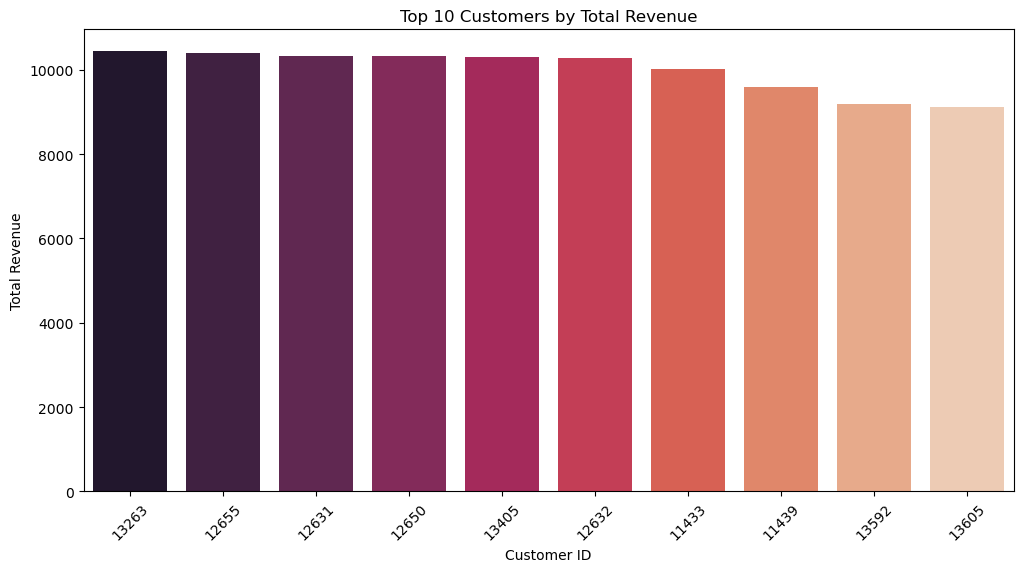

In [15]:
top_customers = customer_segments.sort_values(by='total_revenue', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_customers['CustID'].astype(str), y=top_customers['total_revenue'], palette='rocket')
plt.title('Top 10 Customers by Total Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [17]:
percentiles = customer_segments['total_revenue'].quantile([0.5, 0.9]).values
low_val, high_val = percentiles[0], percentiles[1]

def segment_customer(row):
    if row['total_revenue'] > high_val:
        return 'High Value'
    elif row['total_revenue'] > low_val:
        return 'Mid Value'
    else:
        return 'Low Value'

customer_segments['Segment'] = customer_segments.apply(segment_customer, axis=1)
customer_segments['Segment'].value_counts()

Segment
Low Value     10265
Mid Value      8206
High Value     2053
Name: count, dtype: int64

## Key Insights

- The customer base is predominantly **Low Value** (10,265 customers), with **2,053 high-value customers** contributing a significant portion of total revenue.
- **Top 10 customers** individually generate large revenue volumes, indicating strong B2B or high-value retail relationships.
- High-value customers have a much higher Average Order Value (AOV), demonstrating loyalty and premium purchase behavior.
- The majority of customers are mid-to-low tier, highlighting an opportunity for nurturing campaigns and loyalty programs.
## Recommendation:  
  - Retain and reward high-value customers with exclusive offers and priority service.  
  - Implement targeted upselling strategies for mid-value customers to push them into the high-value segment.  
  - Engage low-value customers with seasonal promotions and discounts to improve lifetime value.